# GRIP : The Sparks Foundation

#GRIPFEB23

#Data Science and Business Analytics Internship

Name : NITHYA SRI R

Task 1
Prediction using Supervised ML

Task -

Predict the percentage of a student based on number of Study hours. This is a simple Linear Regression task as it involves only 2 variables i.e. Scores (dependent) and Hours (independent).

Data can be found at : http://bit.ly/w-data

What would be the score if a student studies for 9.25 hrs/day

In [24]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
     


In [25]:

#Saving URL link to a variable named df
df = "https://bit.ly/w-data"

#reading the csv file from the given url and stores into a DataFrame
Dataset= pd.read_csv(df)

In [3]:
#printing first 5 records of the data frame
print(Dataset.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [4]:
#number of rows and columns
Dataset.shape
     

(25, 2)

In [5]:

Dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:

# Check if there any null value in the Dataset
Dataset.isnull == True

False

In [8]:
#correlation

co =Dataset.corr(method='pearson')

In [9]:
co

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


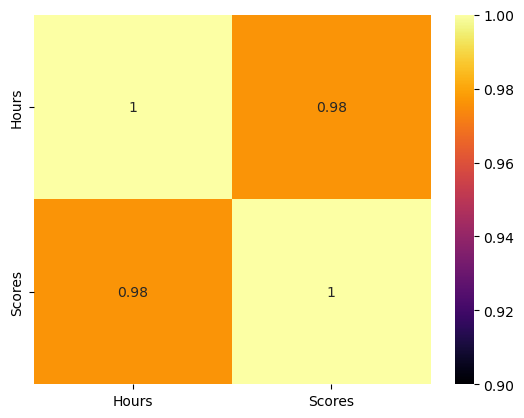

In [10]:

sns.heatmap(co,cmap='inferno',annot=True, vmin=0.9,vmax=1)
plt.show()

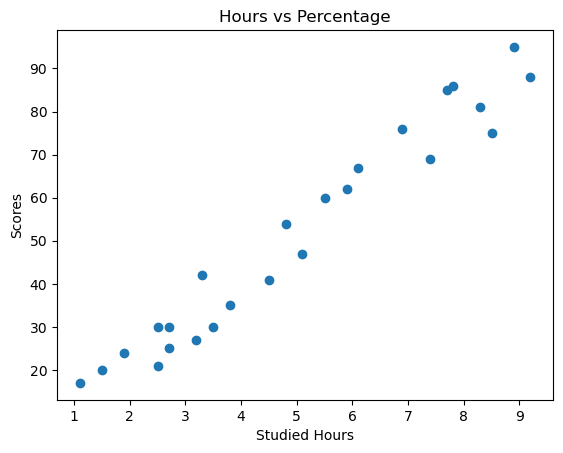

In [11]:

#Hours Vs Percentage of Scores
plt.scatter(Dataset['Hours'], Dataset['Scores'])
plt.title('Hours vs Percentage')
plt.xlabel('Studied Hours')
plt.ylabel('Scores')
plt.show()



#From the visualisation we can understand that it is a Positive Linear Relation that exists between Hours and Scores


In [12]:
#Train-Test Split

#X will take all the values except for the last column which is our dependent variable (target variable)
X = Dataset.iloc[:, :-1].values
y = Dataset.iloc[:, -1].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
     

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
     

LinearRegression()

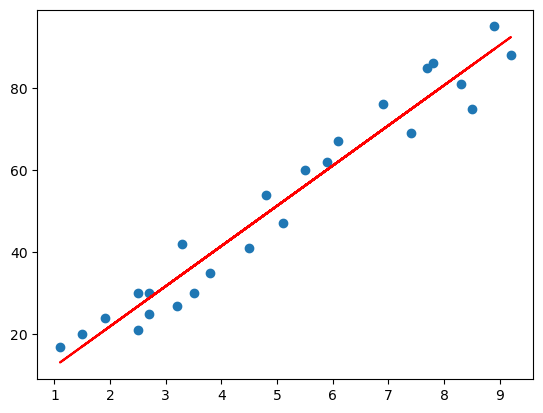

In [16]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color = 'red');
plt.show()

In [17]:
#Predicting the Test set results
y_pred = regressor.predict(X_test)
print(y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


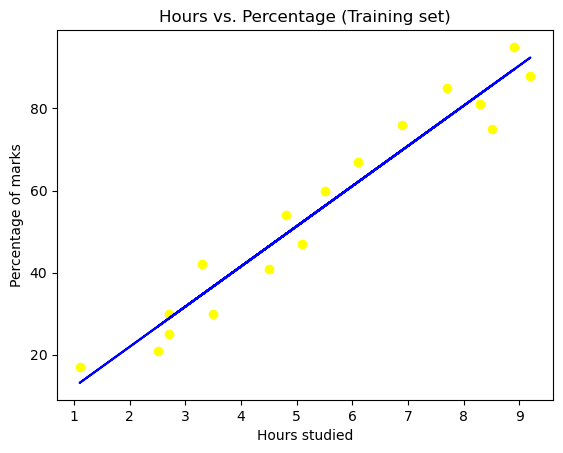

In [18]:
#Visualising the Training set results
plt.scatter(X_train, y_train, color = 'yellow')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs. Percentage (Training set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

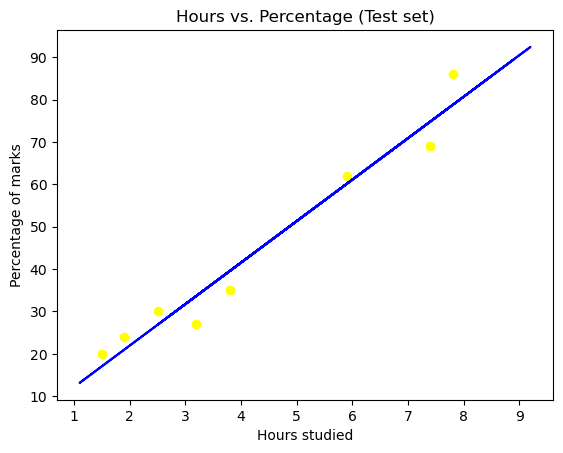

In [19]:
#Visualising the Test set results
plt.scatter(X_test, y_test, color = 'yellow')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs. Percentage (Test set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()


In [20]:

#Comparing the actual values with the predicted ones.
dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dataset
     

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [21]:
#predicting the score 
dataset = np.array(9.25)
dataset = dataset.reshape(-1, 1)
pred = regressor.predict(dataset)
print("If the student studies for 9.25 hours/day, the score is {}.".format(pred))
     

If the student studies for 9.25 hours/day, the score is [92.91505723].


In [22]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
     

Mean Absolute Error: 4.419727808027652


In [23]:
from sklearn.metrics import r2_score
print("The R-Square of the model is: ",r2_score(y_test,y_pred))
     

The R-Square of the model is:  0.9568211104435257


### We used a Linear Regression Model to predict the score of a student if he/she studies for 9.25 hours/day and the Predicted Score came out to be 92.91.